In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ipl_pairs.csv')

In [108]:
def chart(batsman, bowlers, metric):
    plt.title(batsman)
    plt.ylabel(metric)
    plt.bar(range(len(bowlers)), dataset[(dataset['batsman'] == batsman) & (dataset['bowler'].isin(bowlers))][metric], color=('orange', 'blue', 'green', 'red', 'purple', 'yellow', 'cyan', 'magenta', 'pink', 'grey', 'brown'))
    plt.xticks(range(len(bowlers)),bowlers,rotation=90)
    plt.show()

In [92]:
batsman = 'CH Gayle'
role = False
teams = {'our': [
    'JC Buttler',
    'PA Patel',
    'RG Sharma',
    'R Nana',
    'KA Pollard',
    'AT Rayudu',
    'KH Pandya',
    'HH Pandya',
    'Harbhajan Singh',
    'MJ McClenaghan',
    'JJ Bumrah'
],
         'opp': [
             'CH Gayle',
             'V Kohli',
             'Mandeep Singh',
             'AB de Villiers',
             'KM Jadhav',
             'STR Binny',
             'TM Head',
             'S Badree',
             'TS Mills',
             'YS Chahal',
             'S Arvind'
         ]}

In [15]:
def take_input():
    your_team_name = input('Enter name of your team: ')
    teams['our'] = [x for x in list(map(str.strip, input('Enter team members: ').split(',')))]
    print()
    opp_team_name = input('Enter name of opponent team: ')
    teams['opp'] = [x for x in list(map(str.strip, input('Enter team members: ').split(',')))]
    print()
    role = input('Enter role of your team (Batting / Bowling):' ).strip().lower() == 'batting'
    print()
    batsman = input('Batsman on strike: ').strip()

In [86]:
def analyze():
    bowlers = teams['our']
    if role:
        bowlers = teams['opp']
    suggestions = dataset[(dataset['batsman'] == batsman) & (dataset['bowler'].isin(bowlers))].sort_values('metric')['bowler'].values
    metrics = dataset[(dataset['batsman'] == batsman) & (dataset['bowler'].isin(bowlers))].sort_values('metric')['metric'].values
    print('Suggested bowlers: ')
    # print('\t' + '\n\t'.join(suggestions))
    for x, y in zip(suggestions, metrics):
          print('\t' + x + '\t' + str(y*100))
    
    chart(batsman, suggestions, 'strike_rate')
    chart(batsman, suggestions, 'economy')
    chart(batsman, suggestions, 'bowler_strike_rate')
    chart(batsman, suggestions, 'bowler_average')

Suggested bowlers: 
	HH Pandya	0.0
	Harbhajan Singh	15.29777053271409
	MJ McClenaghan	78.05349202349264
	RG Sharma	119.68202110268868
	JJ Bumrah	177.72780133749274
	KA Pollard	607.3862570961453


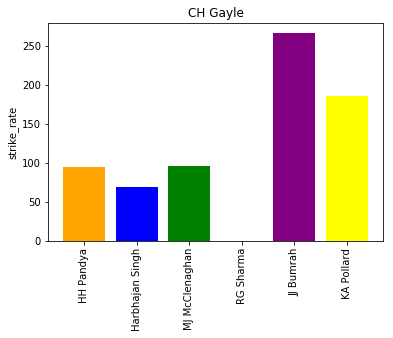

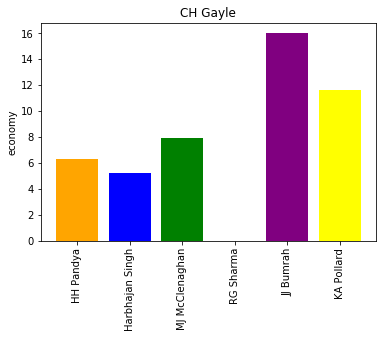

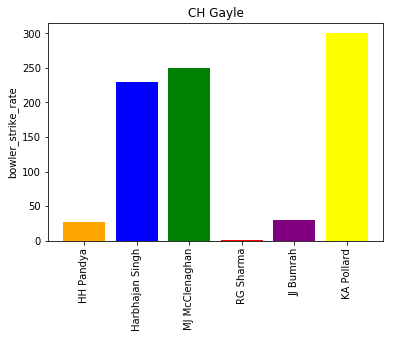

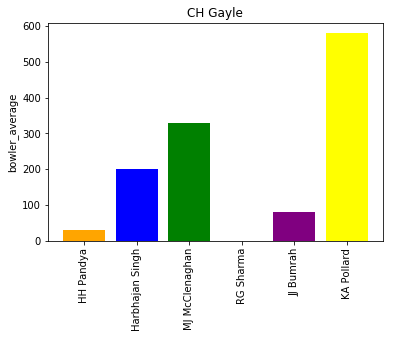

In [113]:
batsman = 'CH Gayle'
role = False
analyze()